# Dimensionality reduction

## Principal Component Analysis

Principal component analysis is a method that rotates the dataset in a way such that
the rotated features are statistically uncorrelated. This rotation is often followed by
selecting only a subset of the new features, according to how important they are for
explaining the data.
In other words, PCA is a method for compressing a lot of data into a form that captures the essence of the original data.

In [57]:
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import warnings
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE


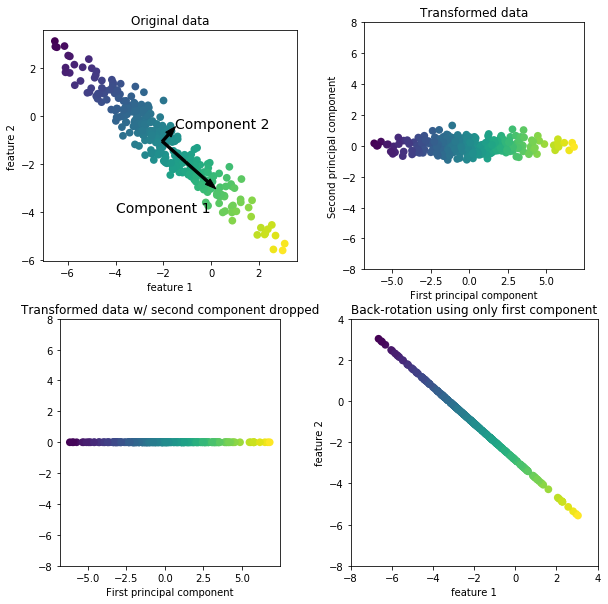

In [2]:
mglearn.plots.plot_pca_illustration()

The figure above shows a bunch of points in 2D space. PCA finds the directions of maximum variance in the data. Since the space is 2D, there are only two directions. We can claerly see that the direction with the longer arrow has more variance than the direction orthogonal to it. In PCA we only look at directions that are orthogonal to each other.
So, basically we have two components in the diagram. The second figure shows how the data looks when it is rotated for the first component to be parallel to the X-axis. At this stage, we don't have any dimensionality reduction. However, moving to the 3rd figure, we see that the second component has been removed and we're left with a one dimensional version of the data (same as dropping the Y-axis and projecting everything on the X-axis). We can now rotate it back to the original angle (fig 4), which shows us how much of the data got shaved off. This is not a one-dimensional projection of the dataset.

In general, there as as many components as original features.

**If we scale the data after rotation, then all the features assume equal importance. This process is called Whitening.**

One of the most common applications of PCA is visualizing high-dimensional datasets.
The breast cancer dataset has 30 features, and it is very hard to visualize them using pair plots. We could draw histograms for the univariate features, but then we won't be able to see the interactions between different features, so that analysis is not very informative.   
Using PCA, we can capture the main interactions
and get a slightly more complete picture. We can find the first two principal components,
and visualize the data in this new two-dimensional space with a single scatter
plot.

In [4]:
cancer = load_breast_cancer()
scaler = StandardScaler()
# scaling the data so that each feature has unit variance
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Using PCA. We find the principla components by calling the `fit` method. Apply rotation and dimensionality reduction by calling `transform`

In [6]:
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Plotting the first two principal components

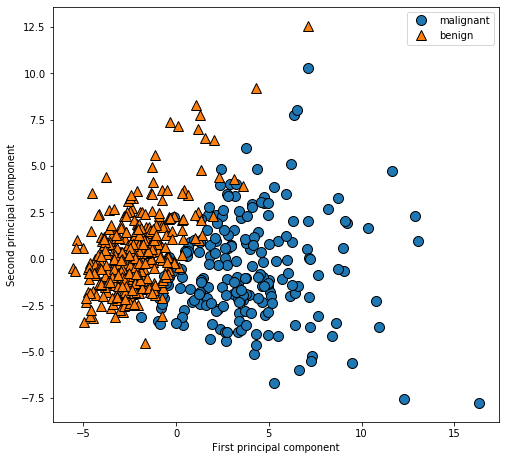

In [10]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

The first and the second components separate quite nicely, so we can fit a linear classifier to classify the data.
A downside of PCA is that the two axes in the plot are often not very easy to interpret.
The principal components correspond to directions in the original data, so they are
combinations of the original features. However, these combinations are usually very
complex

In [11]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [12]:
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Each row is a component. In this case we have only two components because we set `n_components` = 2 in an earlier step. Components are sorted in order of importance.   
The columns correspond to the original features attribute of the PCA in this example, “mean radius,” “mean texture,” and so on.   
Visualizing the coefficients using a heat map:

Text(0, 0.5, 'Principal components')

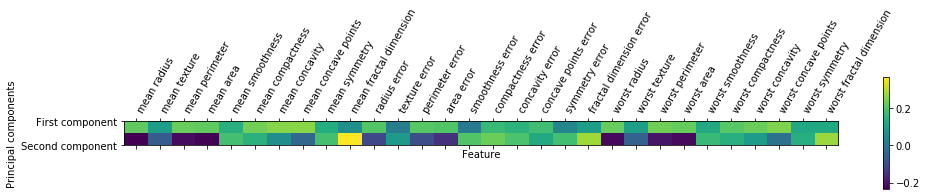

In [13]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

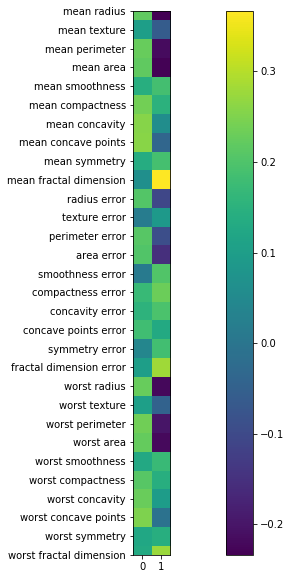

In [15]:
plt.figure(figsize=(20,10))
plt.imshow(pca.components_.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()
plt.show()

As we can see both the components are a mixture of all the 30 features of the dataset. This makes the explanation of the axes in the previous figure tricky.   
The coefficients in the first component all have the positive sign. Having the same sign means there's a general correlation betqween features. The signs are mixed in the second component.   
**Sign of the component does not matter**

#### Fitting PCA on unscaled data

<Figure size 1440x720 with 0 Axes>

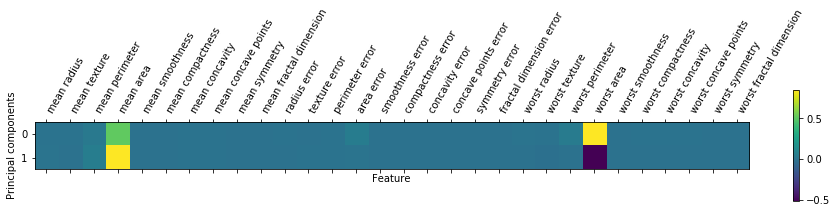

In [26]:
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(cancer.data)
# transform data onto the first two principal components
X_pca = pca.transform(cancer.data)

plt.figure(figsize=(20,10))
plt.matshow(pca.components_, cmap='viridis')
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.colorbar()
plt.show()


If we fit PCA on unscaled data and then draw the heat map, we can see that `mean area` and `worst area` are the two features that dominate the principal components.

### PCA for regularization
PCA can be used for regularization by trimming down the number of features. Below is the comparison of L2 regularization and PCA on LogisticRegression.   
If we restrict dimensionality too much, then accuracy could fall. The optimal number of components can be evaluated using grid search with cross validation.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

with warnings.catch_warnings(record=True) as w:
    lr = LogisticRegression(C=10000).fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.960093896713615
0.9300699300699301


In [38]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.960093896713615
0.9230769230769231


In [45]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

PCA is uunsupervised, so we could potentially lose important class information

### Feature extraction
Another application of PCA is feature extraction.    
The idea
behind feature extraction is that it is possible to find a representation of your data
that is better suited to analysis than the raw representation you were given.   

Using PCA for feature extraction of images will work only when the images in the dataset are highly aligned (eyes, mouth etc) are at roughly the same place in every image. PCA won't work if there is a translation or transformation aspect to images in the dataset.

Max. dimensionality = no. of samples in the dataset

## Discriminant Analysis
### Linear Discriminant Analysis
Supervised technique. Can be used for dimensionality reduction
- Generative model: assumes each class has Gaussian distribution
- Covariances are the same for all classes.
- Very fast: only compute means and invert covariance matrix (works well if n_features << n_samples)
- Leads to linear decision boundary.
- Imagine: transform space by covariance matrix, then nearest centroid.
- No parameters to tune!

Each class has a mean but covariance matrix is shared.
Linear Discriminant Analysis is a linear classifier with a probabilistic model.

### PCA and LDA:

- Both fit Gaussian model
- PCA for the whole data
- LDA multiple Gaussians with shared covariance
- Can use LDA to transform space!
- At most as many components as there are classes - 1 (needs between class variance)

PCA is better when we don't have any ground truth since it is unsupervised.

## Manifold learning

Used to go down to 2 or 3 dimensions.

Manifold learning algorithms are mainly aimed at visualization, and so are rarely
used to generate more than two new features. Some of them, including t-SNE, compute
a new representation of the training data, but don’t allow transformations of new
data. **This means these algorithms cannot be applied to a test set: rather, they can only
transform the data they were trained for.**   
Manifold learning can be useful for exploratory
data analysis, but is rarely used if the final goal is supervised learning.

The plots are much less interpretable, but they make for better visualizations.



Loading the digits dataset from sklearn:

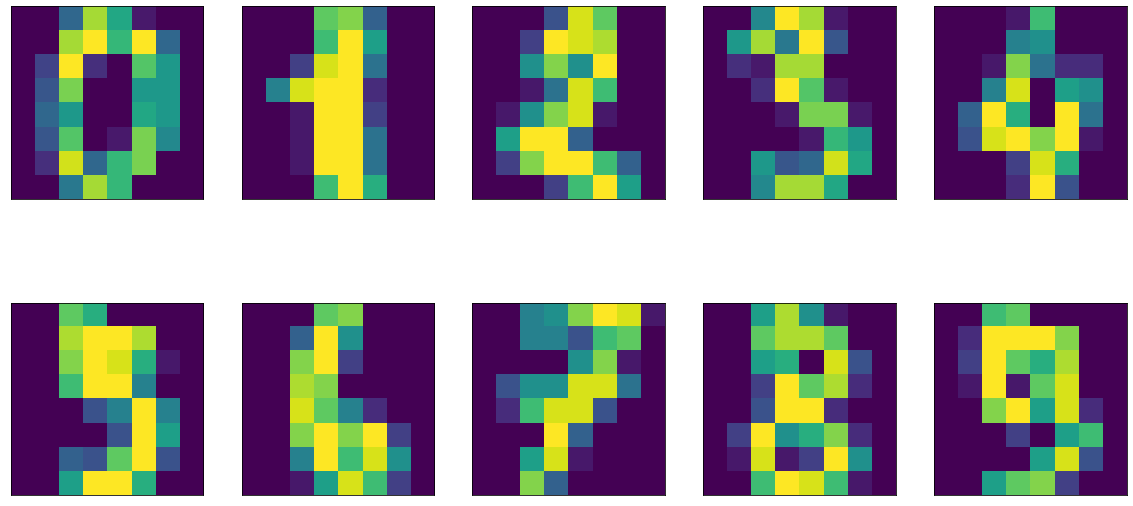

In [50]:
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(20, 10), subplot_kw={'xticks':(), 'yticks':()})
# ravel is used to flatten arrays. 
# subplot_kw -> Dict with keywords passed to the add_subplot call used to create each subplot.
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [51]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Visualizing the data when it is reduced to two dimensions using PCA

Text(0, 0.5, 'Second principal component')

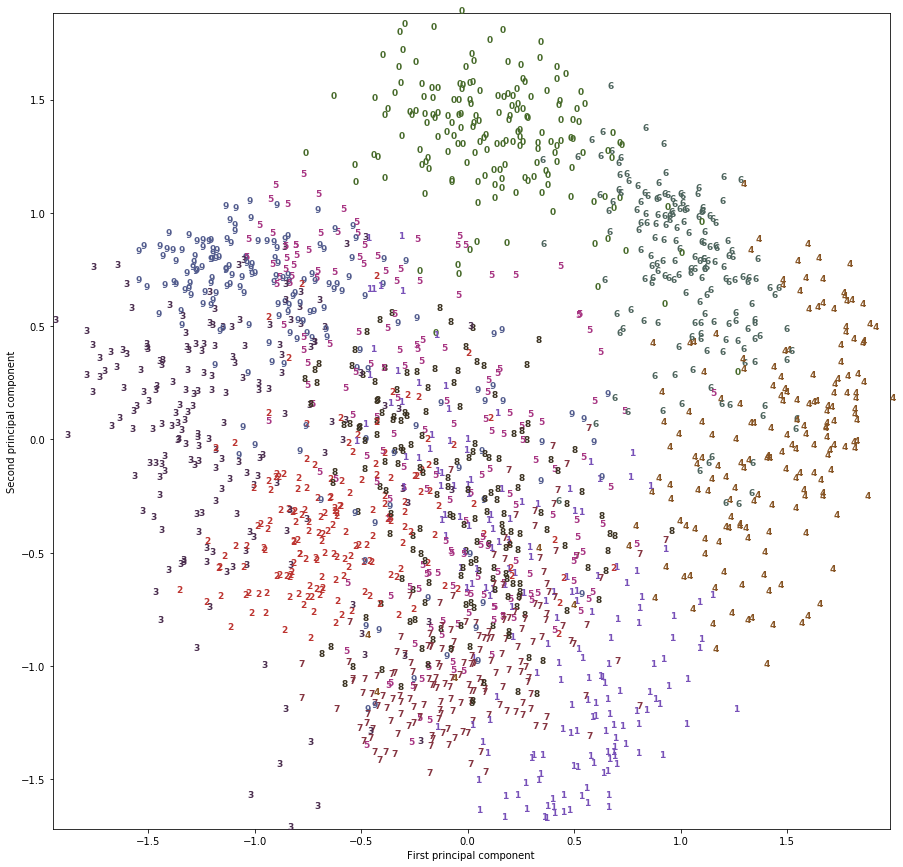

In [62]:
pca = PCA(n_components=2)
X = digits.data / 16.
pca.fit(X)
digits_pca = pca.transform(X)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
            "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(15,15))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
# actually plot the digits as text instead of using scatter
    # plt.scatter(digits_pca[i, 0], digits_pca[i, 1])
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

We can see that most digits overlap significantly.

We'll now try tSNE to see if it improves the visualization of classification

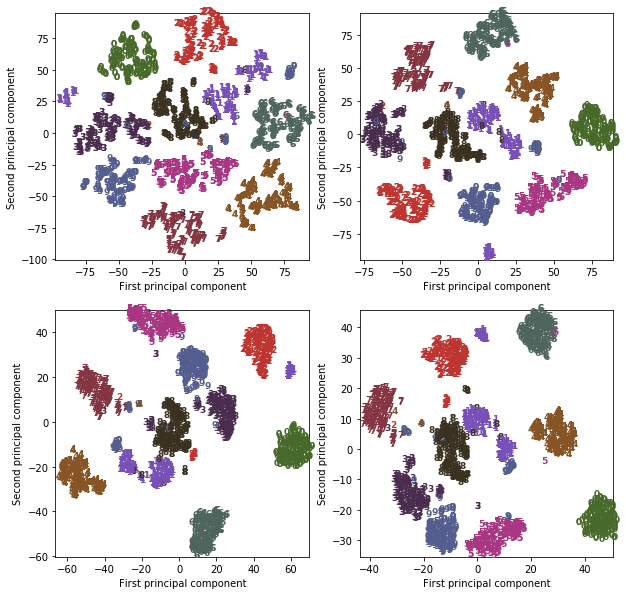

In [65]:
perplexity_vals = [5, 10, 30, 50]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))


for ax, perplexity in zip(axes.ravel(), perplexity_vals):
    tsne = TSNE(random_state=42, perplexity=perplexity)
    # use fit_transform instead of fit, as TSNE has no transform method
    digits_tsne = tsne.fit_transform(digits.data)
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
                "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
    
    ax.set_xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
    ax.set_ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
    for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
        ax.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
                fontdict={'weight': 'bold', 'size': 9})
    ax.set_xlabel("First principal component")
    ax.set_ylabel("Second principal component")

TSNE takes a bit longer, but classifies the data much more cleanly. Given that TSNE is also unsupervised, this is pretty good performance.   
Parameters in tSNE worth tuning: `perplexity` and `early_exaggeration`   
In the figures above we observe that the separation between classes is best shown when `perplexity` is 30. That is usually true for all datasets.